In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Sort_values

In [2]:
tsla = pd.read_csv('tsla_google_finance.csv', index_col = 0)
tsla

ret = tsla.pct_change()
ret.head(5)

,Close
Date,
11/13/18,NaN
11/14/18,0.015558
11/15/18,0.012907
11/16/18,0.016847
11/19/18,-0.002371


Printing top 5 performing days:


In [3]:
sorted_ret = ret.sort_values('Close', ascending = False)
print(sorted_ret.iloc[:5])

             Close
Date              
12/26/18  0.103930
11/26/18  0.061903
1/4/19    0.057697
2/27/19   0.056671
12/28/18  0.056116


<AxesSubplot:xlabel='Date'>

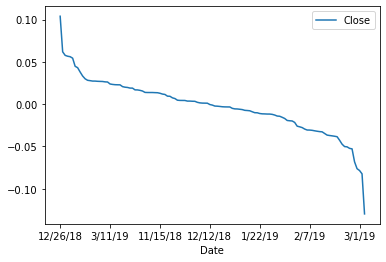

In [4]:
sorted_ret.plot()

<AxesSubplot:xlabel='Date'>

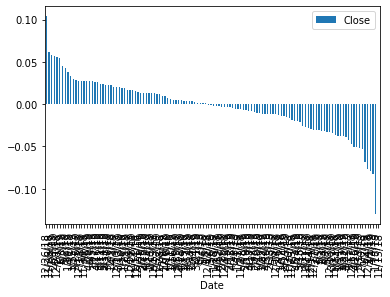

In [5]:
sorted_ret.plot(kind = 'bar')

### <br> Groupby

step 1) split them into groups of respective column (seperate bitcoin , ehtereum etc.) <br> <br> step 2) apply some sort of mathematical function e.g. how many there are: count()

#### parse_dates and the "infer" arguments just ensure that the date column is in pandas format and not a string format

In [6]:
cryp = pd.read_csv('crypto_data.csv', index_col = 'data_date', parse_dates = True, infer_datetime_format = True)
cryp.tail(4)

,cryptocurrency,data_priceUsd,data_time,timestamp
data_date,,,,
2019-05-04,litecoin,77.011308,1.556928e+12,NaN
2019-05-05,litecoin,75.974875,1.557014e+12,NaN
2019-05-06,litecoin,73.722948,1.557101e+12,NaN
2019-05-07,litecoin,75.566057,1.557187e+12,NaN


In [7]:
cryp.isnull().mean()*100

cryptocurrency     0.084364
data_priceUsd      0.393701
data_time          0.253093
timestamp         99.859393
dtype: float64

In [8]:
cryp = cryp.drop(columns=['timestamp', 'data_time'])
cryp.head(5)

,cryptocurrency,data_priceUsd
data_date,,
2017-05-09,bitcoin,NaN
2017-05-10,bitcoin,1743.723523
2017-05-11,bitcoin,1828.678209
2017-05-12,bitcoin,1776.443919
2017-05-13,bitcoin,1714.964198


In [9]:
object_group = cryp.groupby('cryptocurrency').count()
object_group

,data_priceUsd
cryptocurrency,
bitcoin,722
bitcoin-cash,639
ethereum,722
litecoin,728
ripple,728


In [10]:
object_group2 = cryp.groupby(['cryptocurrency', 'data_priceUsd'])['data_priceUsd'].count()
object_group2

cryptocurrency  data_priceUsd
bitcoin         1714.964198      1
                1742.722945      1
                1743.723523      1
                1776.443919      1
                1789.278913      1
                                ..
ripple          2.507770         1
                2.665656         1
                2.667044         1
                2.709364         1
                2.999459         1
Name: data_priceUsd, Length: 3539, dtype: int64

cryptocurrency
bitcoin         AxesSubplot(0.125,0.2;0.775x0.68)
bitcoin-cash    AxesSubplot(0.125,0.2;0.775x0.68)
ethereum        AxesSubplot(0.125,0.2;0.775x0.68)
litecoin        AxesSubplot(0.125,0.2;0.775x0.68)
ripple          AxesSubplot(0.125,0.2;0.775x0.68)
Name: data_priceUsd, dtype: object

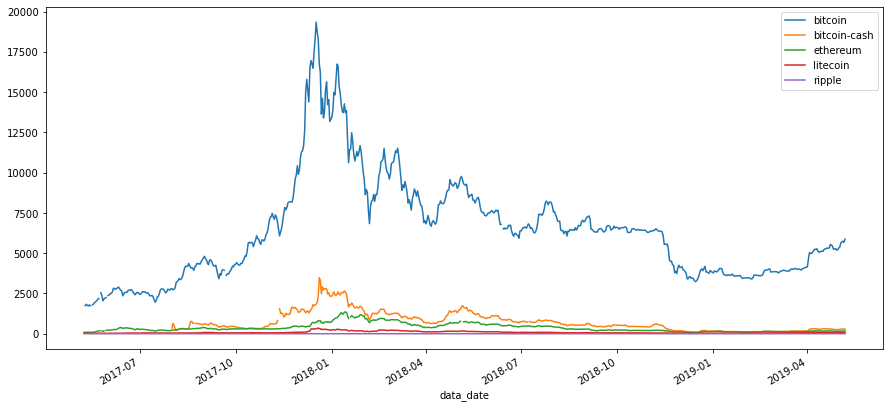

In [11]:
object_group3 = cryp.groupby('cryptocurrency')['data_priceUsd'].plot(figsize=[15,7], legend=True)
object_group3

In [12]:
avg = cryp.groupby('cryptocurrency').mean() #min and max replace 
avg

,data_priceUsd
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


In [13]:
max1 = cryp.groupby('cryptocurrency').max()
max1

,data_priceUsd
cryptocurrency,
bitcoin,19339.922660
bitcoin-cash,3476.844119
ethereum,1346.037491
litecoin,352.713468
ripple,2.999459


In [14]:
min1 = cryp.groupby('cryptocurrency').min()
min1

,data_priceUsd
cryptocurrency,
bitcoin,1714.964198
bitcoin-cash,78.977344
ethereum,84.374014
litecoin,22.550468
ripple,0.154144


In [15]:
compare = pd.DataFrame()
compare['avg'] = avg['data_priceUsd']
compare['max'] = max1['data_priceUsd']
compare['min'] = min1['data_priceUsd']

In [16]:
compare['range'] = compare['min']/compare['max']
compare

,avg,max,min,range
cryptocurrency,,,,
bitcoin,6323.018445,19339.922660,1714.964198,0.088675
bitcoin-cash,733.997564,3476.844119,78.977344,0.022715
ethereum,369.037426,1346.037491,84.374014,0.062683
litecoin,85.618264,352.713468,22.550468,0.063934
ripple,0.475986,2.999459,0.154144,0.051390


<AxesSubplot:>

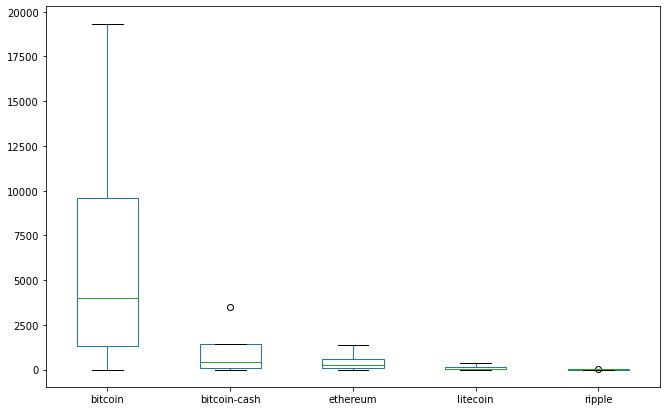

In [17]:
compare.T.plot(kind="box", figsize=[11,7])

<br>

### Multi-indexing

In [18]:
g = pd.read_csv('goog_google_finance.csv', index_col = 0, parse_dates=True, infer_datetime_format=True)
g.index

DatetimeIndex(['2019-05-13', '2019-05-10', '2019-05-09', '2019-05-08',
               '2019-05-07', '2019-05-06', '2019-05-03', '2019-05-02',
               '2019-05-01', '2019-04-30', '2019-04-29', '2019-04-26',
               '2019-04-25', '2019-04-24', '2019-04-23', '2019-04-22',
               '2019-04-18', '2019-04-17', '2019-04-16', '2019-04-15',
               '2019-04-12', '2019-04-11', '2019-04-10', '2019-04-09',
               '2019-04-08', '2019-04-05', '2019-04-04', '2019-04-03',
               '2019-04-02', '2019-04-01', '2019-03-29', '2019-03-28',
               '2019-03-27', '2019-03-26', '2019-03-25', '2019-03-22',
               '2019-03-21', '2019-03-20', '2019-03-19', '2019-03-18',
               '2019-03-15', '2019-03-14', '2019-03-13', '2019-03-12',
               '2019-03-11', '2019-03-08', '2019-03-07', '2019-03-06',
               '2019-03-05', '2019-03-04', '2019-03-01', '2019-02-28',
               '2019-02-27', '2019-02-26', '2019-02-25', '2019-02-22',
      

In [19]:
g_group = g.groupby(
    [
        g.index.year,
        g.index.month,
        #g.index.day
        
    ]
).last()

## Good for Monthly returns if you have daily returns

In [20]:
g_group #last day of the months...

Close
Date Date         
2019 2     1095.01
     3     1140.99
     4     1194.43
     5     1168.08

Average

In [21]:
g_group1 = g.groupby(
    [
        g.index.year,
        g.index.month,
        g.index.day
        
    ]
).mean()

In [22]:
g_group1 #average price each day

Close
Date Date Date         
2019 2    11    1095.01
          12    1121.37
          13    1120.16
          14    1121.67
          15    1113.65
...                 ...
     5    7     1174.10
          8     1166.27
          9     1162.38
          10    1164.27
          13    1132.03

[64 rows x 1 columns]

In [23]:
slice_dates = g_group1.loc[2019,5]
slice_dates

,Close
Date,
1,1168.08
2,1162.61
3,1185.40
6,1189.39
7,1174.10
8,1166.27
9,1162.38
10,1164.27
13,1132.03


<br>

Mean price for all of 2019

In [24]:
g_group.mean()

Close    1149.6275
dtype: float64

<br>

## Concat

#### pd.concat([x,y], axis = 0, join = 'inner')

join = 'outer' shows all columns even if there arent same columns amongst all df's

<br><br>

## Portfolio Comparisons

In [25]:
# me = pd.read_csv('my_portfolio.csv', index_col = 0, parse_dates = True, infer_datetime_format = True)
# harold = pd.read_csv('harold_portfolio.csv', index_col = 0, parse_dates = True, infer_datetime_format = True)

<br> <br>

## Pivot Tables

In [2]:
mu = pd.read_csv('mu_historical.csv', index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
amd = pd.read_csv('amd_historical.csv', index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)

#### Initial clean function:

In [3]:
def clean(x):
    df = pd.read_csv(x, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
    df.sort_index(inplace=True)
    
    return df

In [4]:
def cleanv2(x):
    #df = pd.read_csv(x, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
    df.sort_index(inplace=True)
    
    return df

In [5]:
mu1 = clean('mu_historical.csv')
amd1 = clean('amd_historical.csv')

In [6]:
all_prices = pd.concat([mu1, amd1], axis=0, join='inner')
all_prices = all_prices.reset_index()

# Like a regular pivot table, where columns are the closing prices for each ticker... 
all_prices = all_prices.pivot_table(values = 'NOCP', index='Trade DATE', columns = 'Symbol')
all_prices.head()

Symbol,AMD,MU
Trade DATE,,
2018-05-15,12.45,54.01
2018-05-16,12.82,56.50
2018-05-17,12.82,54.70
2018-05-18,13.00,53.39
2018-05-21,12.99,55.48


In [7]:
all_returns = all_prices.pct_change()
all_returns.head()

Symbol,AMD,MU
Trade DATE,,
2018-05-15,NaN,NaN
2018-05-16,0.029719,0.046103
2018-05-17,0.000000,-0.031858
2018-05-18,0.014041,-0.023949
2018-05-21,-0.000769,0.039146


<br>

### Dot Weights - Portfolio construction

In [8]:
weight = [0.5, 0.5]
port_ret = all_returns.dot(weight)
port_ret

Trade DATE
2018-05-15         NaN
2018-05-16    0.037911
2018-05-17   -0.015929
2018-05-18   -0.004954
2018-05-21    0.019188
                ...   
2019-05-07   -0.036052
2019-05-08    0.001731
2019-05-09   -0.003823
2019-05-10    0.009580
2019-05-13   -0.050789
Length: 250, dtype: float64

In [9]:
vol = all_returns.std() * np.sqrt(252)
vol

Symbol
AMD    0.682623
MU     0.461623
dtype: float64

<AxesSubplot:xlabel='Trade DATE'>

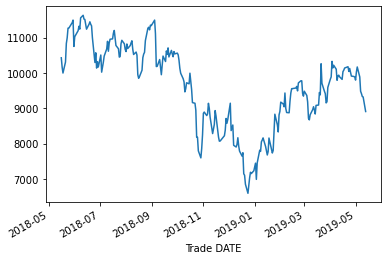

In [10]:
initial_investment = 10000

weights = [0.2, 0.8]
port_returns = all_returns.dot(weights)

# This functiong gets you how different the return is from one (they aren't in order etc....)
cum_ret = (1+port_returns).cumprod()

(initial_investment * cum_ret).plot()

# <br> <br> Step by Step portfolio Return / Risk Method

In [11]:
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv('bk_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv('fang_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv('jnj_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv('luv_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv('mu_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv('nke_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv('sbux_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv('t_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv('wdc_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv('wrk_data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)

In [17]:
new = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis = 1, join = 'inner')
columns = ['bk', 'fang', 'jnj', 'luv', 'mu', 'nke', 'sbux', 't', 'wdc', 'wrk']
new.columns = columns
new = new.sort_index()
ret = new.pct_change()
ret

,bk,fang,jnj,luv,mu,nke,sbux,t,wdc,wrk
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645
...,...,...,...,...,...,...,...,...,...,...
2019-05-14,-0.002969,0.017817,-0.002770,0.011951,0.030230,0.013813,0.004956,0.020348,0.038148,0.029623
2019-05-15,-0.010636,-0.000458,0.000658,0.006970,-0.002597,0.004064,0.009084,0.005146,0.019270,0.006722
2019-05-16,0.000645,0.014396,0.009495,0.011152,-0.028638,0.003214,0.014660,0.011840,-0.008793,-0.000534


In [18]:
corr = ret.corr()
corr

,bk,fang,jnj,luv,mu,nke,sbux,t,wdc,wrk
bk,1.000000,0.316856,0.350064,0.390731,0.339511,0.352312,0.361186,0.284662,0.373527,0.473280
fang,0.316856,1.000000,0.221352,0.169883,0.257745,0.228170,0.211182,0.186524,0.259662,0.294395
jnj,0.350064,0.221352,1.000000,0.248263,0.173480,0.297197,0.366453,0.343575,0.223365,0.295180
luv,0.390731,0.169883,0.248263,1.000000,0.296751,0.285755,0.314467,0.220850,0.273768,0.294395
mu,0.339511,0.257745,0.173480,0.296751,1.000000,0.196334,0.247012,0.174143,0.609577,0.405658
nke,0.352312,0.228170,0.297197,0.285755,0.196334,1.000000,0.398614,0.240217,0.242891,0.271221
sbux,0.361186,0.211182,0.366453,0.314467,0.247012,0.398614,1.000000,0.238597,0.281220,0.303981
t,0.284662,0.186524,0.343575,0.220850,0.174143,0.240217,0.238597,1.000000,0.153232,0.281383
wdc,0.373527,0.259662,0.223365,0.273768,0.609577,0.242891,0.281220,0.153232,1.000000,0.397666
wrk,0.473280,0.294395,0.295180,0.294395,0.405658,0.271221,0.303981,0.281383,0.397666,1.000000


In [19]:
import seaborn as sn

<AxesSubplot:>

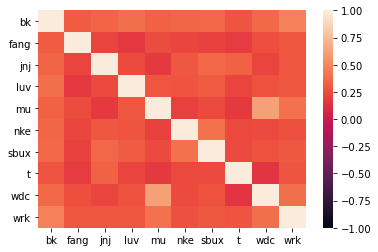

In [20]:
hm = sn.heatmap(corr, vmin = -1, vmax = 1)
hm

In [21]:
corr1 = corr.sum(axis=1)
corr1.sort_values()

t       3.123182
fang    3.145768
luv     3.494862
nke     3.512710
jnj     3.518928
mu      3.700211
sbux    3.722712
wdc     3.814908
wrk     4.017159
bk      4.242129
dtype: float64

In [22]:
ret1 = ret.drop(columns = ['bk', 'wrk'])
ret1

,fang,jnj,luv,mu,nke,sbux,t,wdc
date,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290
2015-06-26,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452
2015-06-29,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485
2015-06-30,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192
...,...,...,...,...,...,...,...,...
2019-05-14,0.017817,-0.002770,0.011951,0.030230,0.013813,0.004956,0.020348,0.038148
2019-05-15,-0.000458,0.000658,0.006970,-0.002597,0.004064,0.009084,0.005146,0.019270
2019-05-16,0.014396,0.009495,0.011152,-0.028638,0.003214,0.014660,0.011840,-0.008793


In [23]:
sharpe_ratio = ((ret1.mean() *252) / (ret1.std() * math.sqrt(252)))
sharpe_ratio

fang    0.421266
jnj     0.609743
luv     0.520850
mu      0.435027
nke     0.585923
sbux    0.545402
t      -0.050216
wdc    -0.245731
dtype: float64

In [25]:
lowest_sr = ret1.drop(columns = ['wdc', 't', 'sbux'])
lowest_sr

,fang,jnj,luv,mu,nke
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020139,-0.002114,0.004076,-0.001663,-0.009414
2015-06-26,-0.014923,0.005246,-0.004929,-0.181515,0.042672
2015-06-29,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594
2015-06-30,0.002927,-0.002252,-0.002712,0.005873,0.003251
...,...,...,...,...,...
2019-05-14,0.017817,-0.002770,0.011951,0.030230,0.013813
2019-05-15,-0.000458,0.000658,0.006970,-0.002597,0.004064
2019-05-16,0.014396,0.009495,0.011152,-0.028638,0.003214


In [28]:
init = 10000
weights = [0.5, 0.5, 0.5, 0.5, 0.5]

port_ret1 = lowest_sr.dot(weights)
port_ret1

date
2015-06-24         NaN
2015-06-25   -0.014627
2015-06-26   -0.076725
2015-06-29   -0.059991
2015-06-30    0.003543
                ...   
2019-05-14    0.035521
2019-05-15    0.004318
2019-05-16    0.004809
2019-05-17   -0.015149
2019-05-20   -0.039148
Length: 983, dtype: float64

In [32]:
cum_ret1 = (1+ port_ret1).cumprod()
profit = init * cum_ret1

<AxesSubplot:xlabel='date'>

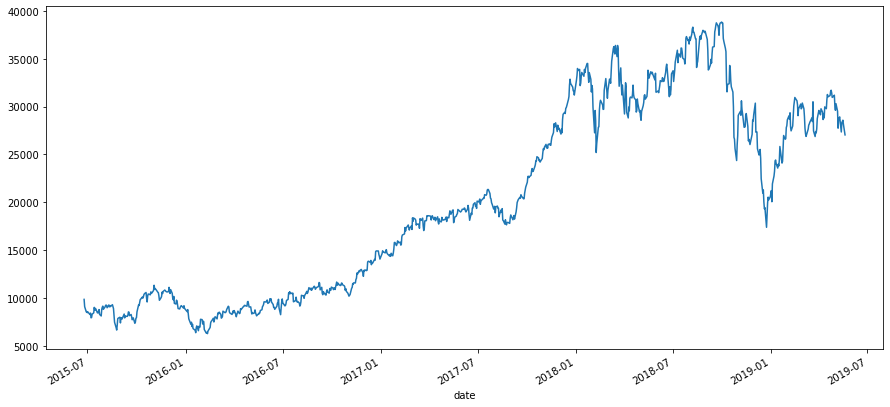

In [33]:
p = profit.plot(figsize = [15,7])
p

In [37]:
weights1 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5 , 0.5]

port_ret_og = ret.dot(weights1)
og_cum = (1+port_ret_og).cumprod()
og_plot = og_cum * init 

# <br> Plotting things on same axis method

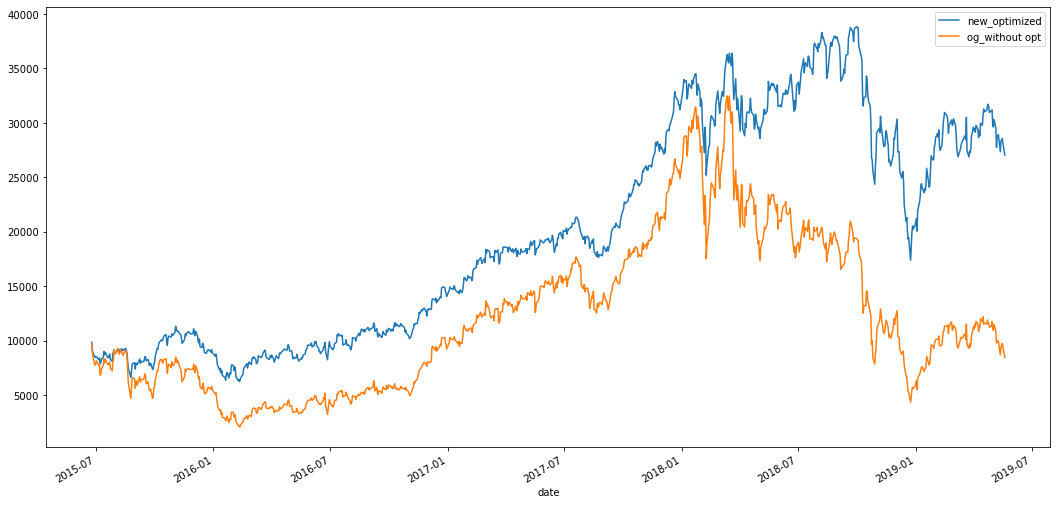

In [45]:
ax = profit.plot(figsize = [18,9])
og_plot.plot(ax=ax)

ax.legend(['new_optimized', 'og_without opt'])